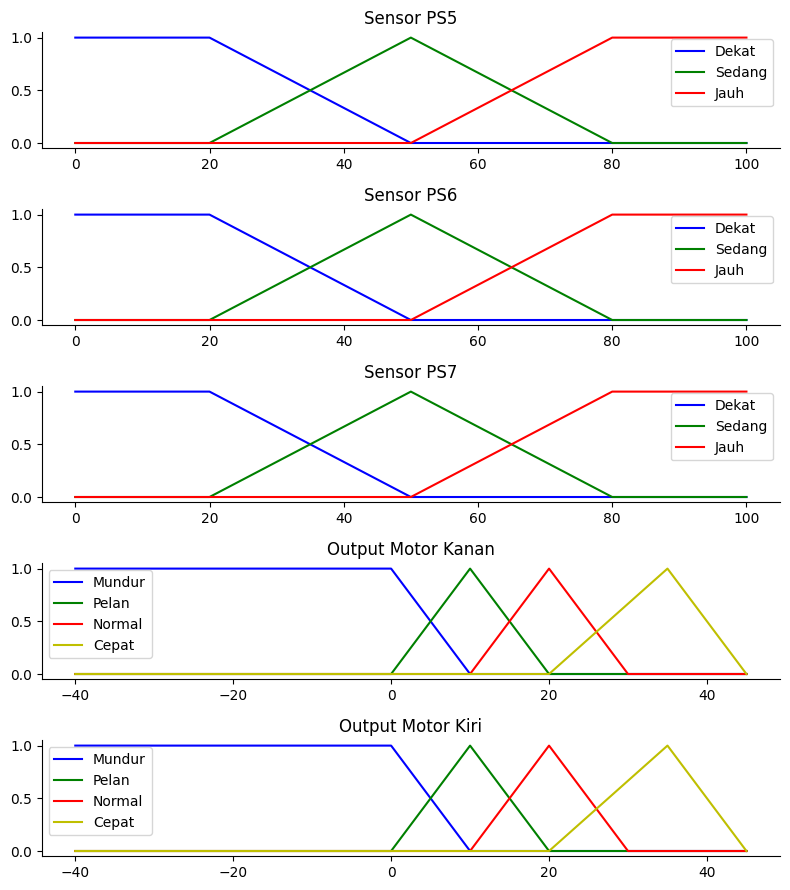

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz

x_sensor = np.arange(0, 101, 1)
x_motor = np.arange(-40, 46, 1)

#Define Membership Function
ps5_dekat = fuzz.trapmf(x_sensor, [0, 0, 20, 50])
ps5_sedang = fuzz.trimf(x_sensor, [ 20, 50, 80])
ps5_jauh = fuzz.trapmf(x_sensor, [50, 80, 100, 100])
    
ps6_dekat = fuzz.trapmf(x_sensor, [0, 0, 20, 50])
ps6_sedang = fuzz.trimf(x_sensor, [20, 50, 80])
ps6_jauh = fuzz.trapmf(x_sensor, [50, 80, 100, 100])
    
ps7_dekat = fuzz.trapmf(x_sensor,[0, 0, 20, 50])
ps7_sedang = fuzz.trimf(x_sensor, [20, 50, 80])
ps7_jauh = fuzz.trapmf(x_sensor, [50, 80, 100, 100])
    
mtrkanan_mundur = fuzz.trapmf(x_motor, [-45, -45, 0, 10])
mtrkanan_pelan = fuzz.trimf(x_motor, [0, 10, 20])
mtrkanan_normal = fuzz.trimf(x_motor, [10, 20, 30])
mtrkanan_cepat = fuzz.trimf(x_motor, [20, 35, 45])
    
mtrkiri_mundur = fuzz.trapmf(x_motor, [-45, -45, 0, 10])
mtrkiri_pelan = fuzz.trimf(x_motor, [0, 10, 20])
mtrkiri_normal = fuzz.trimf(x_motor, [10, 20, 30])
mtrkiri_cepat = fuzz.trimf(x_motor, [20, 35, 45])

# Visualize these universes and membership functions
fig, (ax0, ax1, ax2, ax3, ax4) = plt.subplots(nrows=5, figsize=(8, 9))

ax0.plot(x_sensor, ps5_dekat, 'b', linewidth=1.5, label='Dekat')
ax0.plot(x_sensor, ps5_sedang, 'g', linewidth=1.5, label='Sedang')
ax0.plot(x_sensor, ps5_jauh, 'r', linewidth=1.5, label='Jauh')
ax0.set_title('Sensor PS5')
ax0.legend()

ax1.plot(x_sensor, ps6_dekat, 'b', linewidth=1.5, label='Dekat')
ax1.plot(x_sensor, ps6_sedang, 'g', linewidth=1.5, label='Sedang')
ax1.plot(x_sensor, ps6_jauh, 'r', linewidth=1.5, label='Jauh')
ax1.set_title('Sensor PS6')
ax1.legend()

ax2.plot(x_sensor, ps7_dekat, 'b', linewidth=1.5, label='Dekat')
ax2.plot(x_sensor, ps7_sedang, 'g', linewidth=1.5, label='Sedang')
ax2.plot(x_sensor, ps7_jauh, 'r', linewidth=1.5, label='Jauh')
ax2.set_title('Sensor PS7')
ax2.legend()

ax3.plot(x_motor, mtrkanan_mundur, 'b', linewidth=1.5, label='Mundur')
ax3.plot(x_motor, mtrkanan_pelan, 'g', linewidth=1.5, label='Pelan')
ax3.plot(x_motor, mtrkanan_normal, 'r', linewidth=1.5, label='Normal')
ax3.plot(x_motor, mtrkanan_cepat, 'y', linewidth=1.5, label='Cepat')
ax3.set_title('Output Motor Kanan')
ax3.legend()

ax4.plot(x_motor, mtrkiri_mundur, 'b', linewidth=1.5, label='Mundur')
ax4.plot(x_motor, mtrkiri_pelan, 'g', linewidth=1.5, label='Pelan')
ax4.plot(x_motor, mtrkiri_normal, 'r', linewidth=1.5, label='Normal')
ax4.plot(x_motor, mtrkiri_cepat, 'y', linewidth=1.5, label='Cepat')
ax4.set_title('Output Motor Kiri')
ax4.legend()

# Turn off the top/right axes for aesthetic reasons
for ax in (ax0, ax1, ax2, ax3, ax4):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()
plt.show()

Kecepatan motor kiri :  11.256858460791465
Kecepatan motor kanan :  6.182399590688151


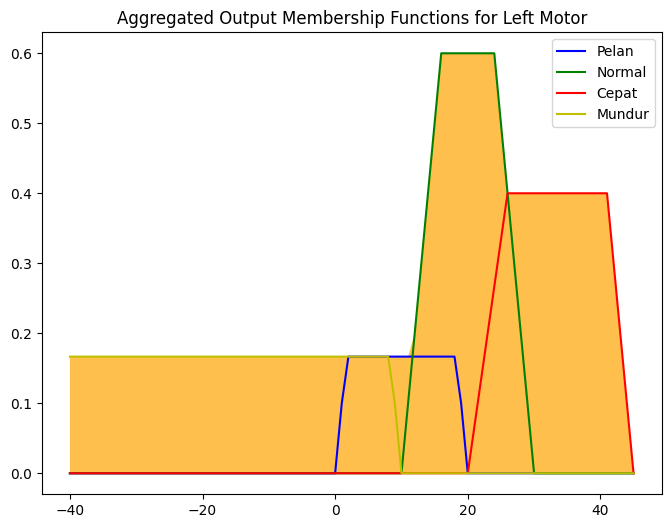

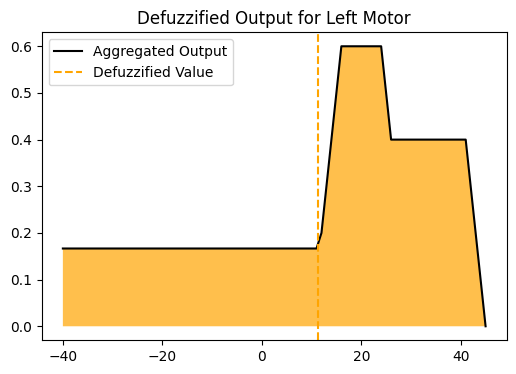

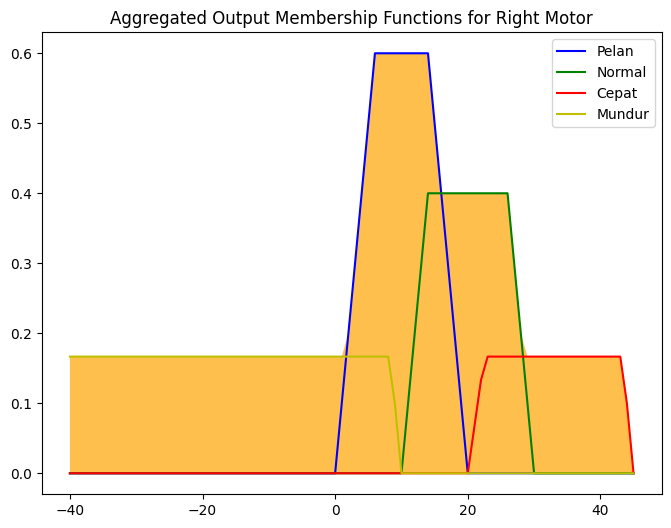

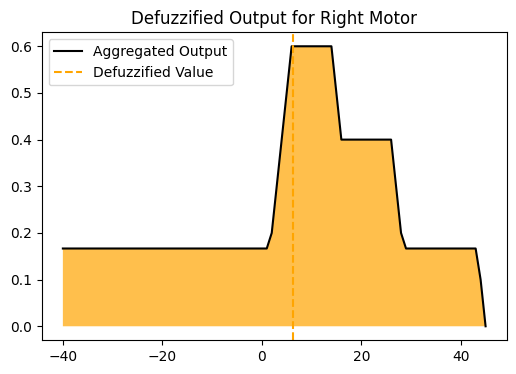

In [17]:
ps5 = 25
ps6 = 40
ps7 = 68
# Compute Value Input
ps5_lvl_dekat = fuzz.interp_membership(x_sensor, ps5_dekat, ps5)
ps5_lvl_sedang = fuzz.interp_membership(x_sensor, ps5_sedang, ps5)
ps5_lvl_jauh = fuzz.interp_membership(x_sensor, ps5_jauh, ps5)

ps6_lvl_dekat = fuzz.interp_membership(x_sensor, ps6_dekat, ps6)
ps6_lvl_sedang = fuzz.interp_membership(x_sensor, ps6_sedang, ps6)
ps6_lvl_jauh = fuzz.interp_membership(x_sensor, ps6_jauh, ps6)

ps7_lvl_dekat = fuzz.interp_membership(x_sensor, ps7_dekat, ps7)
ps7_lvl_sedang = fuzz.interp_membership(x_sensor, ps7_sedang, ps7)
ps7_lvl_jauh = fuzz.interp_membership(x_sensor, ps7_jauh, ps7)

# Rule base
rules_1 = np.fmin(ps7_lvl_dekat, np.fmin(ps6_lvl_dekat, ps5_lvl_dekat)) #CEPAT, MUNDUR
rules_2 = np.fmin(ps7_lvl_sedang, np.fmin(ps6_lvl_dekat, ps5_lvl_dekat)) #CEPAT, LAMBAT
rules_3 = np.fmin(ps7_lvl_jauh, np.fmin(ps6_lvl_dekat, ps5_lvl_dekat)) #CEPAT,LAMBAT
rules_4 = np.fmin(ps7_lvl_dekat, np.fmin(ps6_lvl_sedang, ps5_lvl_dekat)) #CEPAT, MUNDUR
rules_5 = np.fmin(ps7_lvl_sedang, np.fmin(ps6_lvl_sedang, ps5_lvl_dekat)) #CEPAT, NORMAL
rules_6 = np.fmin(ps7_lvl_jauh, np.fmin(ps6_lvl_sedang, ps5_lvl_dekat)) #LAMBAT, CEPAT
rules_7 = np.fmin(ps7_lvl_dekat, np.fmin(ps6_lvl_jauh, ps5_lvl_dekat)) #CEPAT, MUNDUR
rules_8 = np.fmin(ps7_lvl_sedang, np.fmin(ps6_lvl_jauh, ps5_lvl_dekat)) #CEPAT, NORMAL
rules_9 = np.fmin(ps7_lvl_jauh, np.fmin(ps6_lvl_jauh, ps5_lvl_dekat)) #MUNDUR, CEPAT
rules_10 = np.fmin(ps7_lvl_dekat, np.fmin(ps6_lvl_dekat, ps5_lvl_sedang))  # CEPAT, MUNDUR
rules_11 = np.fmin(ps7_lvl_sedang, np.fmin(ps6_lvl_dekat, ps5_lvl_sedang)) #CEPAT, NORMAL
rules_12 = np.fmin(ps7_lvl_jauh, np.fmin(ps6_lvl_dekat, ps5_lvl_sedang)) #LAMBAT, CEPAT
rules_13 = np.fmin(ps7_lvl_dekat, np.fmin(ps6_lvl_sedang, ps5_lvl_sedang)) #CEPAT, MUNDUR
rules_14 = np.fmin(ps7_lvl_sedang, np.fmin(ps6_lvl_sedang, ps5_lvl_sedang)) #NORMAL, LAMBAT
rules_15 = np.fmin(ps7_lvl_jauh, np.fmin(ps6_lvl_sedang, ps5_lvl_sedang)) #MUNDUR, NORMAL
rules_16 = np.fmin(ps7_lvl_dekat, np.fmin(ps6_lvl_jauh, ps5_lvl_sedang)) #LAMBAT, CEPAT
rules_17 = np.fmin(ps7_lvl_sedang, np.fmin(ps6_lvl_jauh, ps5_lvl_sedang)) #CEPAT, CEPAT
rules_18 = np.fmin(ps7_lvl_jauh, np.fmin(ps6_lvl_jauh, ps5_lvl_sedang)) #CEPAT, CEPAT
rules_19 = np.fmin(ps7_lvl_dekat, np.fmin(ps6_lvl_dekat, ps5_lvl_jauh)) #CEPAT, LAMBAT
rules_20 = np.fmin(ps7_lvl_sedang, np.fmin(ps6_lvl_dekat, ps5_lvl_jauh)) #CEPAT, MUNDUR
rules_21 = np.fmin(ps7_lvl_jauh, np.fmin(ps6_lvl_dekat, ps5_lvl_jauh)) #LAMBAT, CEPAT
rules_22 = np.fmin(ps7_lvl_dekat, np.fmin(ps6_lvl_sedang, ps5_lvl_jauh)) #NORMAL, CEPAT
rules_23 = np.fmin(ps7_lvl_sedang, np.fmin(ps6_lvl_sedang, ps5_lvl_jauh)) #CEPAT, LAMBAT
rules_24 = np.fmin(ps7_lvl_jauh, np.fmin(ps6_lvl_sedang, ps5_lvl_jauh)) #CEPAT, CEPAT
rules_25 = np.fmin(ps7_lvl_dekat, np.fmin(ps6_lvl_jauh, ps5_lvl_jauh)) #MUNDUR, CEPAT
rules_26 = np.fmin(ps7_lvl_sedang, np.fmin(ps6_lvl_jauh, ps5_lvl_jauh)) #CEPAT, NORMAL
rules_27 = np.fmin(ps7_lvl_jauh, np.fmin(ps6_lvl_jauh, ps5_lvl_jauh)) #CEPAT, CEPAT

motor0 = np.zeros_like(x_motor)

#Ouput Motor Kanan
pelan_kanan = np.fmin(np.fmax(rules_2, np.fmax(rules_3,np.fmax(rules_6,np.fmax(rules_21, np.fmax(rules_19, rules_23))))), mtrkanan_pelan)
normal_kanan = np.fmin(np.fmax(rules_8,np.fmax(rules_9,np.fmax(rules_5,np.fmax(rules_7,np.fmax(rules_11, rules_26))))), mtrkanan_normal)
cepat_kanan = np.fmin(np.fmax(rules_12,np.fmax(rules_16,np.fmax(rules_17,np.fmax(rules_18,np.fmax(rules_19,np.fmax(rules_22, np.fmax(rules_24,np.fmax(rules_25, rules_27)))))))), mtrkanan_cepat)
mundur_kanan = np.fmin(np.fmax(rules_1,np.fmax(rules_4,np.fmax(rules_10,np.fmax(rules_13, np.fmax(rules_14,rules_20))))), mtrkanan_mundur)
    
#Output_Motor Kiri
pelan_kiri = np.fmin(np.fmax(rules_8,np.fmax(rules_9,np.fmax(rules_12,rules_16))), mtrkiri_pelan)
normal_kiri = np.fmin(np.fmax(rules_6,np.fmax(rules_21, np.fmax(rules_11, np.fmax(rules_14, rules_22)))), mtrkiri_normal)
cepat_kiri = np.fmin(np.fmax(rules_1, np.fmax(rules_3, np.fmax(rules_2, np.fmax(rules_4, np.fmax(rules_5, np.fmax(rules_7, np.fmax(rules_8, np.fmax(rules_10,np.fmax(rules_13,  np.fmax(rules_17,np.fmax(rules_18, np.fmax(rules_19, np.fmax(rules_20, np.fmax(rules_23, np.fmax(rules_24, rules_26))))))))))))))), mtrkiri_cepat)
mundur_kiri = np.fmin(np.fmax(rules_15,np.fmax(rules_26,rules_27)), mtrkiri_mundur)


#Aggregate all three output membership function together
aggregated_kiri = np.fmax(np.fmax(pelan_kiri, normal_kiri), np.fmax(cepat_kiri, mundur_kiri))
kecepatan_motor_kiri  = fuzz.defuzz(x_motor, aggregated_kiri, 'centroid')
hasil_motor_kiri = fuzz.interp_membership(x_motor, aggregated_kiri, kecepatan_motor_kiri)

#Aggregate all three output membership function together
aggregated_kanan = np.fmax(np.fmax(pelan_kanan, normal_kanan), np.fmax(cepat_kanan, mundur_kanan))
kecepatan_motor_kanan  = fuzz.defuzz(x_motor, aggregated_kanan, 'centroid')
hasil_motor_kanan = fuzz.interp_membership(x_motor, aggregated_kanan, kecepatan_motor_kanan)

# Plot aggregated membership functions for left motor
plt.figure(figsize=(8, 6))
plt.plot(x_motor, pelan_kiri, 'b', linewidth=1.5, label='Pelan')
plt.plot(x_motor, normal_kiri, 'g', linewidth=1.5, label='Normal')
plt.plot(x_motor, cepat_kiri, 'r', linewidth=1.5, label='Cepat')
plt.plot(x_motor, mundur_kiri, 'y', linewidth=1.5, label='Mundur')
plt.fill_between(x_motor, motor0, aggregated_kiri, facecolor='Orange', alpha=0.7)
plt.title('Aggregated Output Membership Functions for Left Motor')
plt.legend()

# Plot defuzzified output for left motor
plt.figure(figsize=(6, 4))
plt.plot(x_motor, aggregated_kiri, 'k', linewidth=1.5, label='Aggregated Output')
plt.axvline(x=kecepatan_motor_kiri, color='Orange', linestyle='--', linewidth=1.5, label='Defuzzified Value')
plt.fill_between(x_motor, motor0, aggregated_kiri, facecolor='Orange', alpha=0.7)
plt.title('Defuzzified Output for Left Motor')
plt.legend()

# Plot aggregated membership functions for right motor
plt.figure(figsize=(8, 6))
plt.plot(x_motor, pelan_kanan, 'b', linewidth=1.5, label='Pelan')
plt.plot(x_motor, normal_kanan, 'g', linewidth=1.5, label='Normal')
plt.plot(x_motor, cepat_kanan, 'r', linewidth=1.5, label='Cepat')
plt.plot(x_motor, mundur_kanan, 'y', linewidth=1.5, label='Mundur')
plt.fill_between(x_motor, motor0, aggregated_kanan, facecolor='Orange', alpha=0.7)
plt.title('Aggregated Output Membership Functions for Right Motor')
plt.legend()

# Plot defuzzified output for right motor
plt.figure(figsize=(6, 4))
plt.plot(x_motor, aggregated_kanan, 'k', linewidth=1.5, label='Aggregated Output')
plt.axvline(x=kecepatan_motor_kanan, color='Orange', linestyle='--', linewidth=1.5, label='Defuzzified Value')
plt.fill_between(x_motor, motor0, aggregated_kanan, facecolor='Orange', alpha=0.7)
plt.title('Defuzzified Output for Right Motor')
plt.legend()
print("Kecepatan motor kiri : ", kecepatan_motor_kiri)
print("Kecepatan motor kanan : ", kecepatan_motor_kanan)

plt.show()

In [11]:
def map_value(value):
    # Mengonversi nilai dari rentang -100 hingga -60 menjadi rentang 0 hingga 40
    return int((value + 100) * 2.5)

# Contoh penggunaan
nilai_input = int(input("Masukkan nilai (-100 hingga -60): "))
if -100 <= nilai_input <= -60:
    nilai_terkonversi = map_value(nilai_input)
    print(f"Nilai terkonversi: {nilai_terkonversi}")
else:
    print("Input diluar rentang yang valid (-100 hingga -60).")

Masukkan nilai (-100 hingga -60):  -90


Nilai terkonversi: 25


   2.72
0  2.49
1  1.87
2  0.56
3  1.07
4  2.43
   1.09
0  1.87
1  0.91
2  0.14
3  0.79
4  0.76


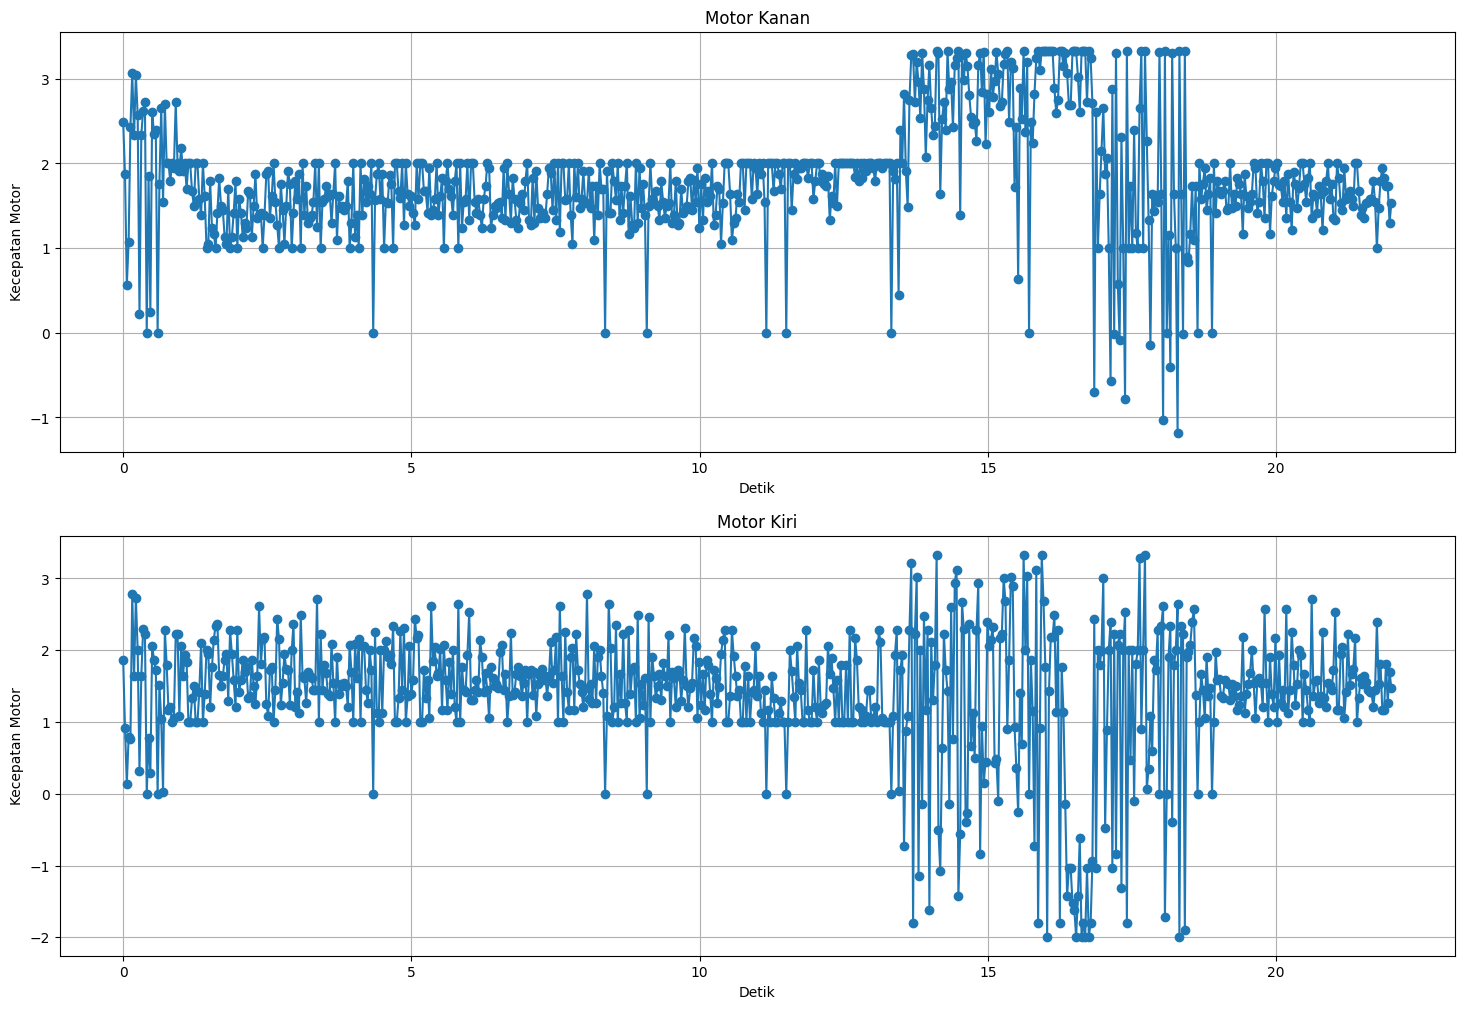

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Membaca file CSV
x_value = np.linspace(0,22,701)
mota = pd.read_csv('motorkanan.csv')
y_value = np.linspace(0,22,701)
moti = pd.read_csv('motorkiri.csv')

#Baris pertama pada data
print(mota.head())
print(moti.head())

# Plot data
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(18, 12))

# Plot sensor kanan
ax1.plot(x_value, mota, marker='o', linestyle='-')
ax1.set_title('Motor Kanan')
ax1.set_xlabel('Detik')
ax1.set_ylabel('Kecepatan Motor')
ax1.grid(True)

# Plot sensor tengah
ax2.plot(y_value, moti, marker='o', linestyle='-')
ax2.set_title('Motor Kiri')
ax2.set_xlabel('Detik')
ax2.set_ylabel('Kecepatan Motor')
ax2.grid(True)

   41
0  28
1  21
2  28
3  37
4  32
   75
0  96
1  75
2  70
3  74
4  75
   90
0  83
1  80
2  74
3  75
4  83


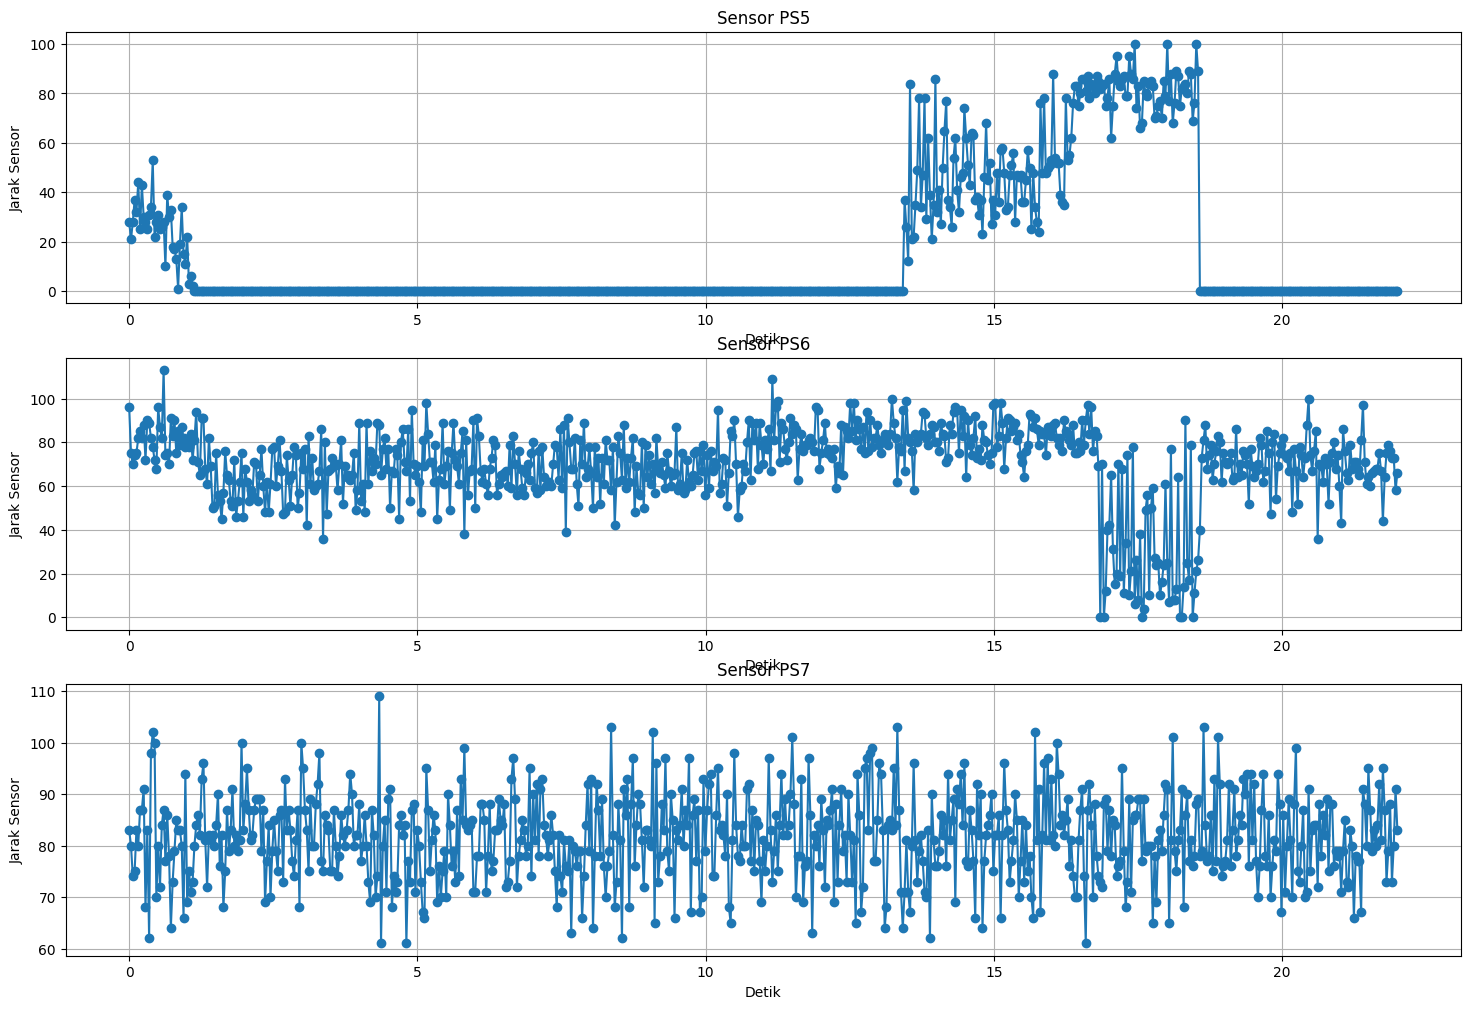

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Membaca file CSV
x_value = np.linspace(0,22,701)
ps5 = pd.read_csv('sensorps5.csv')
y_value = np.linspace(0,22,701)
ps6 = pd.read_csv('sensorps6.csv')
z_value = np.linspace(0,22,701)
ps7 = pd.read_csv('sensorps7.csv')

#Baris pertama pada data
print(ps5.head())
print(ps6.head())
print(ps7.head())

# Plot data
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(18, 12))

# Plot sensor ps5
ax1.plot(x_value, ps5, marker='o', linestyle='-')
ax1.set_title('Sensor PS5')
ax1.set_xlabel('Detik')
ax1.set_ylabel('Jarak Sensor')
ax1.grid(True)

# Plot sensor ps6
ax2.plot(y_value, ps6, marker='o', linestyle='-')
ax2.set_title('Sensor PS6')
ax2.set_xlabel('Detik')
ax2.set_ylabel('Jarak Sensor')
ax2.grid(True)

# Plot sensor ps7
ax3.plot(z_value, ps7, marker='o', linestyle='-')
ax3.set_title('Sensor PS7')
ax3.set_xlabel('Detik')
ax3.set_ylabel('Jarak Sensor')
ax3.grid(True)